In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from analyses_code import preprocessing, wayback_webscrapping

# Border test variants result 

The following countries have the border testing variants results

- UK 2021-02-23 - 2022-02-24 
- Canada 2021-02-23 - 2022-02-24

In [3]:
# importing the UK and Canada data
UK_VOC_border_testing = pd.read_csv(
    './dataset/preprocessed_data/UK_BT/UK_VOC_border_testing_23Feb2021_24Feb2022.tsv'
)
Canada_VOC_border_testing = pd.read_csv(
    './dataset/preprocessed_data/Canada_BT/Canada_VOC_border_Testing.tsv', index_col=[0])
Canada_VOC_border_testing = pd.DataFrame(Canada_VOC_border_testing.iloc[0,2:7]).reset_index()
Canada_VOC_border_testing.columns = ['Variant','Count']
Canada_VOC_border_testing['Count'] = Canada_VOC_border_testing['Count'].astype('float64')

In [4]:
# calculate the percentage of positive tests and adding the country column
UK_VOC_border_testing['percentage'] = round(((UK_VOC_border_testing['Count']/UK_VOC_border_testing['Count'].sum())*100),2)
Canada_VOC_border_testing['percentage'] = round(((Canada_VOC_border_testing['Count']/Canada_VOC_border_testing['Count'].sum())*100),2)
UK_VOC_border_testing['Country'] = 'UK'
Canada_VOC_border_testing['Country'] = 'Canada'

UK_Canada_VOC = pd.concat([UK_VOC_border_testing,Canada_VOC_border_testing])

In [7]:
UK_Canada_VOC

,Variant,Count,percentage,Country
0,Alpha VOC B.1.1.7,3961.0,18.14,UK
1,Beta VOC B.1.351,243.0,1.11,UK
2,Delta VOC B.1.617.2,7301.0,33.43,UK
3,Gamma VOC P.1,43.0,0.20,UK
4,Omicron B.1.1.529,10290.0,47.12,UK
0,Alpha VOC B.1.1.7,2130.0,12.53,Canada
1,Beta VOC B.1.351,107.0,0.63,Canada
2,Delta VOC B.1.617.2,4318.0,25.41,Canada
3,Gamma VOC P.1,149.0,0.88,Canada
4,Omicron B.1.1.529,10289.0,60.55,Canada


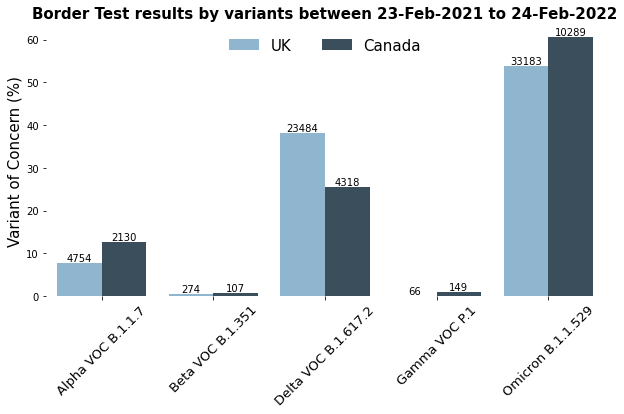

In [6]:
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title('Border Test results by variants between 23-Feb-2021 to 24-Feb-2022',fontweight='bold',fontsize=15)
pal = sns.color_palette("Blues_d", 5)
g = sns.barplot(x='Variant',y='percentage',data=UK_Canada_VOC,hue='Country',ax = ax, palette=[pal[x] for x in [0,4]])
UK_container = g.containers[0]
Canada_container = g.containers[1]
g.bar_label(UK_container,labels=[f'{int(i)}' for i in UK_Canada_VOC.loc[UK_Canada_VOC['Country']=='UK','Count']])
g.bar_label(Canada_container,labels=[f'{int(i)}' for i in UK_Canada_VOC.loc[UK_Canada_VOC['Country']=='Canada','Count']])
ax.set_ylabel('Variant of Concern (%)',fontsize=15)
ax.legend(loc='upper center',prop={'size':15},ncol = 2,frameon=False)
sns.despine(bottom=True, left=True)
ax.set(xlabel=None)
plt.xticks(rotation=45,fontsize=13)
plt.savefig('./output_plot/border_test.png',format='png',dpi=300,bbox_inches="tight")

# Border test positivity

The following countries have the following data
- UK: 2021-02-15 - 2022-02-21: daily
- Canada : 2021-02-21  - 2022-02-19: summary table
- Iceland 2020-06-15 - 2022-02-24: PCR tests : daily
- Israel: 2021-05-01 - 2022-03-15: daily
- Korea: 2020-04-21 - 2022-03-15: only daily new cases
- Thai: 2021-04-21 - 2022-03-18: only daily new cases

In [3]:
# importing the country data
UK_border_testing_monthly = pd.read_csv(
    './dataset/preprocessed_data/UK_BT/UK_border_testing_daily.tsv',
    index_col=[0])
Canada_border_testing_monthly = pd.read_csv(
    './dataset/preprocessed_data/Canada_BT/Canada_border_testing.tsv',
    sep='\t',
    header=[0, 1],
    index_col=[0])
Iceland_border_testing_monthly = pd.read_csv(
    './dataset/preprocessed_data/Iceland_BT/Iceland_total_test.csv',
    header=[0],
    index_col=[0])
Israel_border_testing_monthly = pd.read_csv(
    './dataset/preprocessed_data/Israel_BT/border_testing_total.csv',
    header=[0],
    index_col=[0])
Israel_border_testing_monthly = Israel_border_testing_monthly[Israel_border_testing_monthly['Country'] == 'All Countries']

In [5]:
#plot the bar data
def plot_bar_plot(ax, *dfs):
    all_countries = pd.concat([*dfs], join='inner') #combine the data together
    all_countries.index.name = 'Date'

    g = sns.barplot(x=all_countries.index,
                    y='positive percentage',
                    hue='Country',
                    data=all_countries,
                    ax=ax
)
    unique_countries = all_countries['Country'].unique()
    ax.set_ylabel('Positive test (%)',fontsize=18,weight='bold')
    ax.set_title('Positive border test between 2020-2022',fontsize=20,fontweight='bold')
    ax.tick_params(axis='x', rotation=45,labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.legend(loc='upper left',prop={'size':15})
    ax.set(xlabel=None)
    ax.legend(loc='upper center',fontsize='xx-large',ncol = len(dfs))

In [4]:
Israel_border_testing_monthly = preprocessing.preprocess_daily_data_for_plotting(
    Israel_border_testing_monthly,
    total_col='Total tests',
    positive_col='Total positive',
    country='Israel',
    groupby_Monthly=True)
UK_border_testing_monthly = preprocessing.preprocess_daily_data_for_plotting(
    UK_border_testing_monthly,
    total_col='total',
    positive_col='positive',
    country='UK',
    groupby_Monthly=True)
Iceland_border_testing_monthly = preprocessing.preprocess_daily_data_for_plotting(
    Iceland_border_testing_monthly,
    total_col='Total tests',
    positive_col='positive',
    country='Iceland',
    groupby_Monthly=True)

Canada result ranges from 21-Feb to 4 July, but there is vaccinated data that goes post July as well. We combine the two data together.

In [25]:
Canada_vaccinated_monthly = pd.read_csv(
    './dataset/preprocessed_data/Canada_BT/Canada_testing_result_vaxx.csv')
#sum
Canada_vaccinated_monthly = Canada_vaccinated_monthly.groupby('Date').sum()[[
    'Total tests completed', 'Test positive'
]]
#combine Canada tables

In [26]:
#combine the two together
Canada_border_testing_monthly = pd.concat([
    Canada_border_testing_monthly['Total'][[
        'Total tests completed', 'Test positive'
    ]], Canada_vaccinated_monthly
])

#group the July1-4 in one table with Jul5-Aug8 in another
Canada_border_testing_monthly = Canada_border_testing_monthly.append(
    pd.Series(data=Canada_border_testing_monthly.loc[
        ['July1-4,2021', 'Jul5-Aug8,2021'], :].sum(),
              name='July1-Aug8,2021'))

Canada_border_testing_monthly = Canada_border_testing_monthly.drop(
    ['July1-4,2021', 'Jul5-Aug8,2021'])

Canada_border_testing_monthly = Canada_border_testing_monthly.reindex(index=[
    'Feb21-28,2021', 'Mar1-31,2021', 'Apr1-30,2021', 'May1-31,2021',
    'June1-30,2021', 'July1-Aug8,2021', 'Aug9-Sep9,2021', 'Sep10-Nov27,2021',
    'Nov28-Dec25,2021', 'Dec26-Jan29,2022', 'Jan30-Feb19,2022'
])
Canada_border_testing_monthly.columns = ['total','positive']

In [27]:
Canada_border_testing_monthly_revised = Canada_border_testing_monthly.rename(index={
    'Feb21-28,2021':'Feb-2021',
    'Mar1-31,2021':'Mar-2021',
    'Apr1-30,2021':'Apr-2021',
    'May1-31,2021':'May-2021',
    'June1-30,2021':'Jun-2021',
    'July1-Aug8,2021':'Jul-2021',
    'Aug9-Sep9,2021':'Aug-2021',
    'Nov28-Dec25,2021':'Dec-2021',
    'Dec26-Jan29,2022':'Jan-2022',
    'Jan30-Feb19,2022':'Feb-2022'
})

for index in ['Sep-2021','Oct-2021','Nov-2021']:
    Canada_border_testing_monthly_revised = Canada_border_testing_monthly_revised.append(
        pd.Series(Canada_border_testing_monthly.loc['Sep10-Nov27,2021',:]/3,name=index)
    )
Canada_border_testing_monthly_revised = Canada_border_testing_monthly_revised.drop('Sep10-Nov27,2021',axis=0)

In [28]:
Canada_border_testing_monthly_revised.columns = [
    'Total tests', 'Positive tests'
]
Canada_border_testing_monthly_revised[
    'positive percentage'] = preprocessing.calculate_percentage(
        Canada_border_testing_monthly_revised['Positive tests'],
        Canada_border_testing_monthly_revised['Total tests'])
Canada_border_testing_monthly_revised['Country'] = 'Canada'
Canada_border_testing_monthly_revised = Canada_border_testing_monthly_revised.reindex_like(
    Israel_border_testing_monthly)

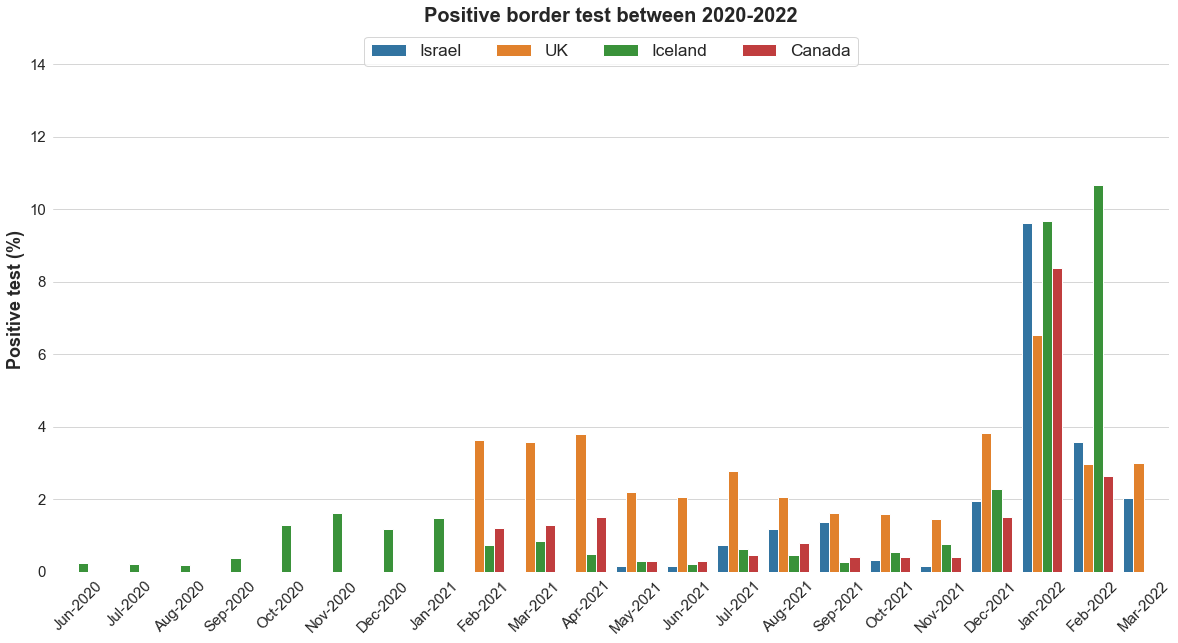

In [73]:
# plot all the data
sns.set_style('whitegrid')
fig,ax = plt.subplots(figsize=(20,10))
plot_bar_plot(ax,Israel_border_testing_monthly,UK_border_testing_monthly,Iceland_border_testing_monthly,Canada_border_testing_monthly_revised)
ax.set_ylim([0,15])
sns.despine(left=True, bottom=True, right=True)
plt.savefig('positive_border.png',format='png',dpi=300, transparent=True)

We can also group the data according to the Canada data, which is not organised monthly.

In [74]:
def group_date_according_to_Canada_table(df):
    return [
        'Feb21-28,2021' if i <= '2021-02-28' else
        'Mar1-31,2021' if '2021-03-01' <= i <= '2021-03-31' else
        'Apr1-30,2021' if '2021-04-01' <= i <= '2021-04-30' else 'May1-31,2021'
        if '2021-05-01' <= i <= '2021-05-31' else 'June1-30,2021'
        if '2021-06-01' <= i <= '2021-06-30' else 'July1-Aug8,2021'
        if '2021-07-01' <= i <= '2021-08-08' else 'Aug9-Sep9,2021'
        if '2021-08-09' <= i <= '2021-09-09' else 'Sep10-Nov27,2021'
        if '2021-09-10' <= i <= '2021-11-27' else 'Nov28-Dec25,2021'
        if '2021-11-28' <= i <= '2021-12-25' else 'Dec26-Jan29,2022'
        if '2021-12-26' <= i <= '2022-01-29' else 'Jan30-Feb19,2022'
        for i in df.index.strftime('%Y-%m-%d')
    ]


UK_border_testing_monthly = preprocessing.get_date_range(
    UK_border_testing_monthly, '2021-02-21', '2022-02-19')
#group this data table to be similar to the Canada table
UK_border_testing_monthly['Date'] = group_date_according_to_Canada_table(
    UK_border_testing_monthly)

#group and calculate the sum
UK_border_testing_monthly = UK_border_testing_monthly.groupby('Date').sum()

In [75]:
def calculate_percentage(x, y):
    return round((100 * x / y), 2)


UK_border_testing_monthly['percent positive'] = calculate_percentage(
    UK_border_testing_monthly['positive'], UK_border_testing_monthly['total'])
Canada_border_testing_monthly['percent positive'] = calculate_percentage(
    Canada_border_testing_monthly['positive'],
    Canada_border_testing_monthly['total'])

Canada_border_testing_monthly['Country'] = 'Canada'
UK_border_testing_monthly['Country'] = 'UK'

#combine the two data together
Canada_UK_border_testing_monthly = pd.concat([
    UK_border_testing_monthly[Canada_border_testing_monthly.columns],
    Canada_border_testing_monthly
])

In [57]:
Iceland_border_testing_monthly['percent positive'] = calculate_percentage(
    Iceland_border_testing_monthly['positive'],
    Iceland_border_testing_monthly['total'])
Iceland_border_testing_monthly['Country'] = 'Iceland'
Canada_UK_border_testing_monthly = Canada_UK_border_testing_monthly.append(
    Iceland_border_testing_monthly)

In [76]:
Canada_UK_border_testing_monthly = Canada_UK_border_testing_monthly.reset_index(
)
Canada_UK_border_testing_monthly['Date'] = pd.Categorical(
    Canada_UK_border_testing_monthly['Date'],
    categories=[
        'Feb21-28,2021', 'Mar1-31,2021', 'Apr1-30,2021', 'May1-31,2021',
        'June1-30,2021', 'July1-Aug8,2021', 'Aug9-Sep9,2021',
        'Sep10-Nov27,2021', 'Nov28-Dec25,2021', 'Dec26-Jan29,2022',
        'Jan30-Feb19,2022'
    ],
    ordered=True)
Canada_UK_border_testing_monthly['Country'] = pd.Categorical(
    Canada_UK_border_testing_monthly['Country'],
    categories=['UK', 'Canada', 'Iceland'],
    ordered=True)

In [77]:
Canada_UK_border_testing_monthly = Canada_UK_border_testing_monthly.sort_values(
    by=['Date', 'Country']).reset_index(drop=True)

Text(0.1, -0.2, 'Numbers on bars denote the number of positive tests')

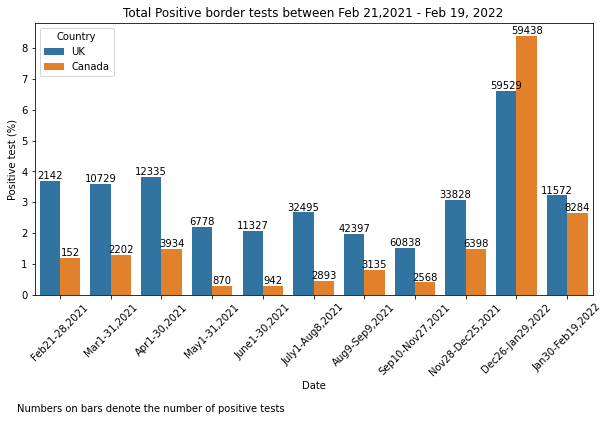

In [78]:
# sns.set(rc={'figure.figsize':(10,8)})
fig, ax = plt.subplots(figsize=(10,5))
g = sns.barplot(x='Date',y='percent positive',hue='Country',data=Canada_UK_border_testing_monthly,ax=ax)
UK_container = g.containers[0]
Canada_container = g.containers[1]
# Iceland_container = g.containers[2]

g.bar_label(UK_container,labels=[f'{int(i)}' for i in Canada_UK_border_testing_monthly.loc[Canada_UK_border_testing_monthly['Country']=='UK','positive']])

g.bar_label(Canada_container,labels=[f'{int(i)}' for i in Canada_UK_border_testing_monthly.loc[Canada_UK_border_testing_monthly['Country']=='Canada','positive']])

# g.bar_label(Iceland_container,labels=[f'{int(i)}' for i in Canada_UK_border_testing_monthly.loc[Canada_UK_border_testing_monthly['Country']=='Iceland','positive']])


ax.set_ylabel('Positive test (%)')
ax.set_title('Total Positive border tests between Feb 21,2021 - Feb 19, 2022')
ax.tick_params(axis='x',rotation=45)
fig.text(0.1, -0.2, 'Numbers on bars denote the number of positive tests', ha='left', size='medium')

## Moving Average Incidence per 100 000 inhabitants

Calculate the moving average incidence per 100 000 inhabitants. Daily data is required here.

In [6]:
# importing the data
UK_border_testing_monthly = pd.read_csv(
    './dataset/preprocessed_data/UK_BT/UK_border_testing_daily.tsv',
    index_col=[0])
Iceland_border_testing_monthly = pd.read_csv(
    './dataset/preprocessed_data/Iceland_BT/Iceland_total_test.csv',
    header=[0],
    index_col=[0])
Israel_border_testing_monthly = pd.read_csv(
    './dataset/preprocessed_data/Israel_BT/border_testing_total.csv',
    header=[0],index_col=[0])
Israel_border_testing_monthly = Israel_border_testing_monthly[Israel_border_testing_monthly['Country'] == 'All Countries']

In [7]:
Korea_border_testing_daily = pd.read_csv(
    './dataset/preprocessed_data/Korea_BT/Korea_border_testing_new_cases_daily.csv',
    index_col=[0])
Korea_border_testing_daily = Korea_border_testing_daily.groupby('Date').sum()
Korea_border_testing_daily.columns = ['Positive tests']

Thai_border_testing_daily = pd.read_csv(
    './dataset/preprocessed_data/Thai_BT/thai_data_border_testing.csv',
    index_col=[0])

In [13]:
Israel_border_testing_monthly = preprocessing.preprocess_daily_data_for_plotting(
    Israel_border_testing_monthly,
    total_col='Total tests',
    positive_col='Total positive',
    country='Israel')
UK_border_testing_monthly = preprocessing.preprocess_daily_data_for_plotting(
    UK_border_testing_monthly,
    total_col='total',
    positive_col='positive',
    country='UK')
Iceland_border_testing_monthly = preprocessing.preprocess_daily_data_for_plotting(
    Iceland_border_testing_monthly,
    total_col='Total tests',
    positive_col='positive',
    country='Iceland')

In [14]:
def calculate_moving_average(df,window=7,min_periods=0):
    df.index = pd.DatetimeIndex(df.index)
    df['Moving Average Positive tests'] = df.rolling(window=window,min_periods=min_periods)['Positive tests'].mean()
    return df

In [15]:
Israel_border_testing_monthly = calculate_moving_average(Israel_border_testing_monthly)
UK_border_testing_monthly = calculate_moving_average(UK_border_testing_monthly)
Iceland_border_testing_monthly = calculate_moving_average(Iceland_border_testing_monthly)
Korea_border_testing_daily = calculate_moving_average(Korea_border_testing_daily)
Thai_border_testing_daily = calculate_moving_average(Thai_border_testing_daily)

In [16]:
def calculate_positive_2W_incidence_per_100k_inhabitant(df, population,positive_col:str='Moving Average Positive tests'):
    df.index = pd.DatetimeIndex(df.index)
    resampled_df = df.resample('W').mean()
    resampled_df['incidence'] = round(
        ((resampled_df[positive_col] / population) * 100000), 2)
    return resampled_df

In [17]:
Israel_incidence_rate = calculate_positive_2W_incidence_per_100k_inhabitant(Israel_border_testing_monthly,9200000)
Iceland_incidence_rate = calculate_positive_2W_incidence_per_100k_inhabitant(Iceland_border_testing_monthly, 366425)
UK_incidence_rate = calculate_positive_2W_incidence_per_100k_inhabitant(UK_border_testing_monthly, 67220000)
Korea_incidence_rate = calculate_positive_2W_incidence_per_100k_inhabitant(Korea_border_testing_daily,51780000)
Thai_incidence_rate = calculate_positive_2W_incidence_per_100k_inhabitant(Thai_border_testing_daily,69800000)

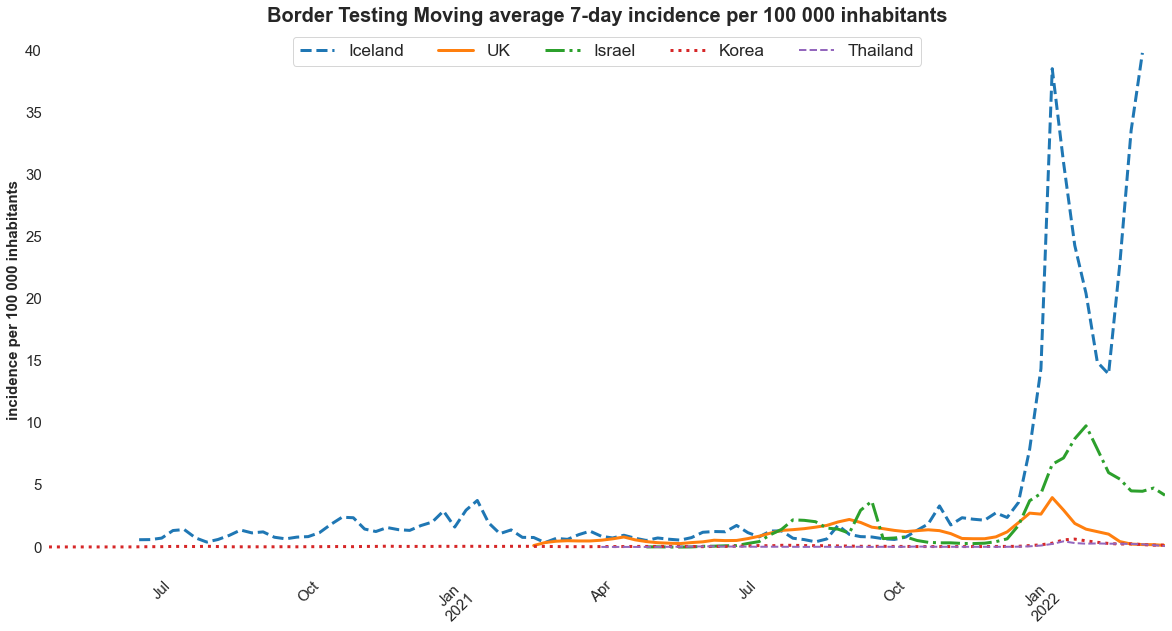

In [56]:
# Iceland_incidence_rate.replace(0, np.nan, inplace=True)
# UK_incidence_rate.replace(0, np.nan, inplace=True)
sns.set_style('white')
fig, ax = plt.subplots(figsize=(20, 10))
Iceland_incidence_rate.plot(y='incidence', label='Iceland', ax=ax,linestyle='--',linewidth=3)
UK_incidence_rate.plot(y='incidence', label='UK', ax=ax,linestyle='-',linewidth=3)
Israel_incidence_rate.plot(y='incidence',label='Israel',ax=ax,linestyle='-.',linewidth=3)
Korea_incidence_rate.plot(y='incidence',label='Korea',ax=ax,linestyle=':',linewidth=3)
Thai_incidence_rate.plot(y='incidence',label='Thailand',ax=ax,linestyle='--',linewidth=2)

ax.set_title('Border Testing Moving average 7-day incidence per 100 000 inhabitants', fontsize=20,fontweight='bold')
ax.set_ylabel('incidence per 100 000 inhabitants',fontsize=15,weight='bold')
# ax.set_xlabel('Date',fontsize=15)
ax.set(xlabel=None)
sns.despine(left=True,right=True, bottom=True,top=True)
ax.legend(loc='upper center',fontsize='xx-large',ncol = 5)
ax.tick_params(axis='x', rotation=45,labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.savefig('border_testing_moving_average.png',format='png',dpi=300, transparent=True)

# Vaccinated vs. Unvaccinated

We have vaccination information for Canada, UK and Israel

Important! UK vaccination data may not be complete as seen on the graph.

## Canada

In [3]:
# importing the Canada data
Canada_testing_result_vaccinated = pd.read_csv(
    './dataset/preprocessed_data/Canada_BT/Canada_testing_result_vaccinated.tsv',
    header=[0, 1])
Canada_testing_result_unvaccinated = pd.read_csv(
    './dataset/preprocessed_data/Canada_BT/Canada_testing_result_unvaccinated.tsv',
    header=[0, 1])

Canada_testing_result_vaccinated.set_index(Canada_testing_result_vaccinated.columns[0],inplace=True)
Canada_testing_result_unvaccinated.set_index(Canada_testing_result_unvaccinated.columns[0],inplace=True)

In [4]:
def convert_percentage_to_float(df):
    return list(map(lambda x: float(x.replace('%', '')), df))


def calculate_total_positive_test(df):
    df[('Total', 'Total')] = df[('Air', 'Tests completed')] + df[
        ('Land', 'Total tests completed')]
    df[('Total', 'percent_pos')] = convert_percentage_to_float(
        df[('Overall  percent positive', 'Overall  percent positive')])
    df[('Total', 'positive')] = round(df[('Total', 'Total')] *
                                      df[('Total', 'percent_pos')] / 100)

    return df['Total'].copy()

In [5]:
Canada_testing_result_unvaccinated = calculate_total_positive_test(Canada_testing_result_unvaccinated)
Canada_testing_result_unvaccinated['Vaccinated'] = 'Unvaccinated'
Canada_testing_result_vaccinated = calculate_total_positive_test(Canada_testing_result_vaccinated)
Canada_testing_result_vaccinated['Vaccinated'] = 'Vaccinated'

Canada_testing_result_unvaccinated.reset_index(inplace=True)
Canada_testing_result_vaccinated.reset_index(inplace=True)

In [6]:
# need to group the rows together into a common date rows.
def change_columns(df):
    df.columns = ['Date'] + df.columns.to_list()[1:]
    return df
Canada_testing_result_unvaccinated = change_columns(Canada_testing_result_unvaccinated)
Canada_testing_result_vaccinated = change_columns(Canada_testing_result_vaccinated)

def group_rows(df):
    new_row1 = df.iloc[3:7,:].groupby(['Vaccinated'],as_index=False).agg({'Total':'sum',
                                                     'percent_pos':'mean',
                                                     'positive':'sum'})
    new_row2 = df.iloc[7:12,:].groupby(['Vaccinated'],as_index=False).agg({'Total':'sum',
                                                     'percent_pos':'mean',
                                                     'positive':'sum'})
    
    new_row3 = df.iloc[12:14,:].groupby(['Vaccinated'],as_index=False).agg({'Total':'sum',
                                                 'percent_pos':'mean',
                                                 'positive':'sum'})
    new_row1['Date'] = 'Nov28-Dec25,2021'
    new_row2['Date'] = 'Dec26-Jan29,2022'
    new_row3['Date'] = 'Jan30-Feb12,2022*'
    df = df.append([new_row1,new_row2,new_row3])
    df = df.reset_index(drop=True)
    df = df.drop([3,4,5,6,7,8,9,10,11,12,13,14])
    df.loc[0,'Date'] = 'Jul5-Aug8,2021'
    df.loc[1,'Date'] = 'Aug9-Sep9,2021'
    df.loc[2,'Date'] = 'Sep10-Nov27,2021'
    df = df.reset_index(drop=True)
    return df

In [7]:
Canada_testing_result_unvaccinated = group_rows(Canada_testing_result_unvaccinated)
Canada_testing_result_vaccinated = group_rows(Canada_testing_result_vaccinated)

In [8]:
Canada_testing_result_vaccinated

,Date,Total,percent_pos,positive,Vaccinated
0,"Jul5-Aug8,2021",324762,0.180,585.0,Vaccinated
1,"Aug9-Sep9,2021",102338,0.200,205.0,Vaccinated
2,"Sep10-Nov27,2021",341249,0.160,546.0,Vaccinated
3,"Nov28-Dec25,2021",335064,1.020,4115.0,Vaccinated
4,"Dec26-Jan29,2022",598998,7.068,43604.0,Vaccinated
5,"Jan30-Feb12,2022*",193366,2.820,5480.0,Vaccinated


In [9]:
vaxxed_summary_table = pd.concat([Canada_testing_result_unvaccinated,Canada_testing_result_vaccinated])

Text(0.1, 0.0006, 'Numbers on bars denote the number of positive tests; * Results incomplete as results are still incoming')

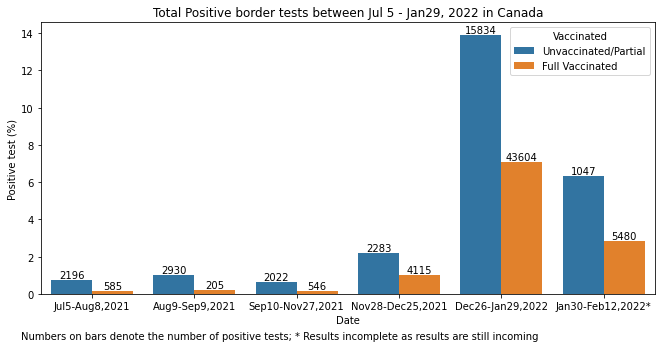

In [25]:
# sns.set(rc={'figure.figsize':(10,8)})
fig, ax = plt.subplots(figsize=(11,5))
g = sns.barplot(x='Date',y='percent_pos',hue='Vaccinated',data=vaxxed_summary_table,ax=ax)
unvax_container = g.containers[0]
vax_container = g.containers[1]
g.bar_label(unvax_container,labels=[f'{int(i)}' for i in vaxxed_summary_table.loc[vaxxed_summary_table['Vaccinated']=='Unvaccinated','positive']])

g.bar_label(vax_container,labels=[f'{int(i)}' for i in vaxxed_summary_table.loc[vaxxed_summary_table['Vaccinated']=='Vaccinated','positive']])

for t,l in zip(g.legend_.texts,['Unvaccinated/Partial','Full Vaccinated']):
    t.set_text(l)

ax.set_ylabel('Positive test (%)')
ax.set_title('Total Positive border tests between Jul 5 - Jan29, 2022 in Canada')
fig.text(0.1, 0.0006, 'Numbers on bars denote the number of positive tests; * Results incomplete as results are still incoming', ha='left', size='medium')

## UK

In [28]:
# importing the UK data
UK_vaxx_result = pd.read_csv(
    './dataset/UK_BT/2022-02-28_big_table.by_vaccination_status.csv')
UK_vaxx_result = UK_vaxx_result[
    UK_vaxx_result['vacc_status_clean'] != 'vaccinated_unknown_doses']
UK_vaxx_result = UK_vaxx_result.reset_index(drop=True)

In [29]:
#at least one dose vs. no dose
UK_vaxx_result['Vaxx status'] = [
    'Unvaccinated' if x == 'no' else 'Vaccinated (at least one dose)'
    for x in UK_vaxx_result['vacc_status_clean']
]

In [34]:
UK_vaxx_result = UK_vaxx_result.groupby(['first_test_date','Vaxx status']).sum()

In [35]:
UK_vaxx_result_monthly = preprocessing.preprocess_daily_data_for_plotting(UK_vaxx_result,total_col='total',
                                                positive_col='positive', date_start='2021-02-15',
                                                date_end='2022-02-27',groupby_Monthly=True)

In [40]:
UK_vaxx_result_monthly = UK_vaxx_result_monthly.reset_index().set_index('Month')

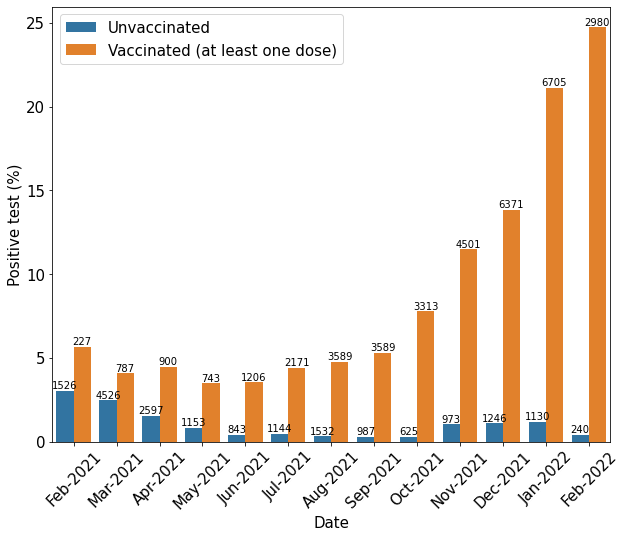

In [41]:
fig,ax = plt.subplots(figsize=(10,8))
preprocessing.plot_bar_plot(ax,UK_vaxx_result_monthly,hue = 'Vaxx status',bar_annotate=True)

## Israel

In [2]:
Israel_vaccination = pd.read_csv('./dataset/preprocessed_data/Israel_BT/vaccination_status.csv')

In [3]:
Israel_vaccination['Vaccinated (at least one dose)'] = Israel_vaccination[
    'Vaccinated residents'] + Israel_vaccination[
        'Vaccinated(not valid) residents']
Israel_vaccination[
    'Positive vaccinated (at least one dose)'] = Israel_vaccination[
        'Positive and vaccinated'] + Israel_vaccination[
            'Positive and vaccinated (not valid)']

In [4]:
Israel_vaccination = Israel_vaccination.groupby(['Date', 'Country'])[[
    'Vaccinated (at least one dose)', 'Unvaccinated residents',
    'Positive vaccinated (at least one dose)', 'Positive unvaccinated'
]].sum()

In [5]:
multicol = pd.MultiIndex.from_tuples([
    ('Total tests', 'Vaccinated (at least one dose)'),
    ('Total tests', 'Unvaccinated'),
    ('Total positives', 'Vaccinated (at least one dose)'),
    ('Total positives', 'Unvaccinated')
])
Israel_vaccination.columns = multicol
Israel_vaccination = Israel_vaccination.stack()
Israel_vaccination.index.names = ['Date', 'Country', 'Vaxx status']

In [6]:
Israel_vaccination_monthly_status = preprocessing.preprocess_daily_data_for_plotting(
    Israel_vaccination,
    total_col='Total tests',
    positive_col='Total positives',
    date_start='2021-02-15',
    date_end='2022-03-15',
    groupby_Monthly=True)

In [11]:
Israel_vaccination_monthly_status = Israel_vaccination_monthly_status.loc[:,
                                                                          'All Countries', :].reset_index(
                                                                          ).set_index(
                                                                              'Month'
                                                                          )

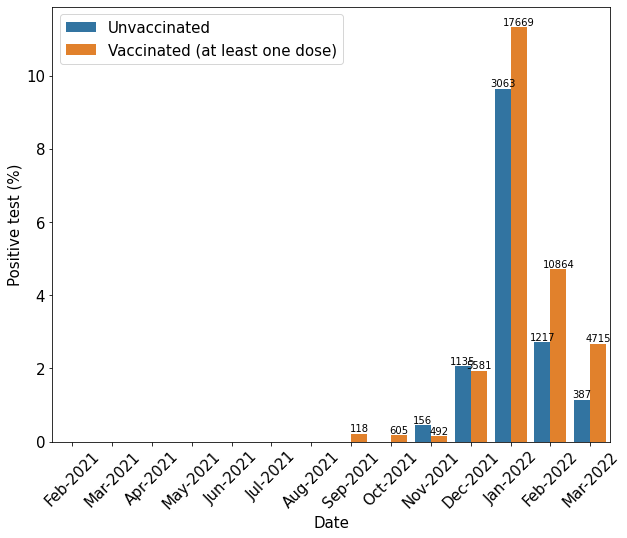

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
preprocessing.plot_bar_plot(ax,
                            Israel_vaccination_monthly_status,
                            hue='Vaxx status',
                            bar_annotate=True)

# Border testing by country of depatures

Only the UK and the Israel have daily information about travellers.

In [2]:
Israel_border_testing = pd.read_csv(
    './dataset/preprocessed_data/Israel_BT/border_testing_total.csv',
    header=0,
    index_col=[0])
Israel_border_testing = Israel_border_testing[
    Israel_border_testing['Country'] != 'All Countries']

In [5]:
#import information
UK_border_testing_by_country = pd.read_csv(
    './dataset/UK_BT/2022-03-14_big_table.21_day_window.csv',
    usecols=[0, 1, 2, 3, 4])
UK_border_testing_by_country = UK_border_testing_by_country.drop(
    UK_border_testing_by_country[
        UK_border_testing_by_country['territory_name'].isin(
            ['Unknown-multiple', 'Unknown', '0'])].index).reset_index(
                drop=True)  # removed the ones with zero as territory name
UK_border_testing_by_country = UK_border_testing_by_country.set_index(
    'first_test_date')

UK_border_testing_by_country.replace('United Arab Emirates (The)',
                                     'UAE',
                                     inplace=True)
UK_border_testing_by_country.replace('United States of America (The)',
                                     'USA',
                                     inplace=True)
UK_border_testing_by_country.replace('Netherlands (The)',
                                     'Netherlands',
                                     inplace=True)
Israel_border_testing.replace('United States', 'USA', inplace=True)

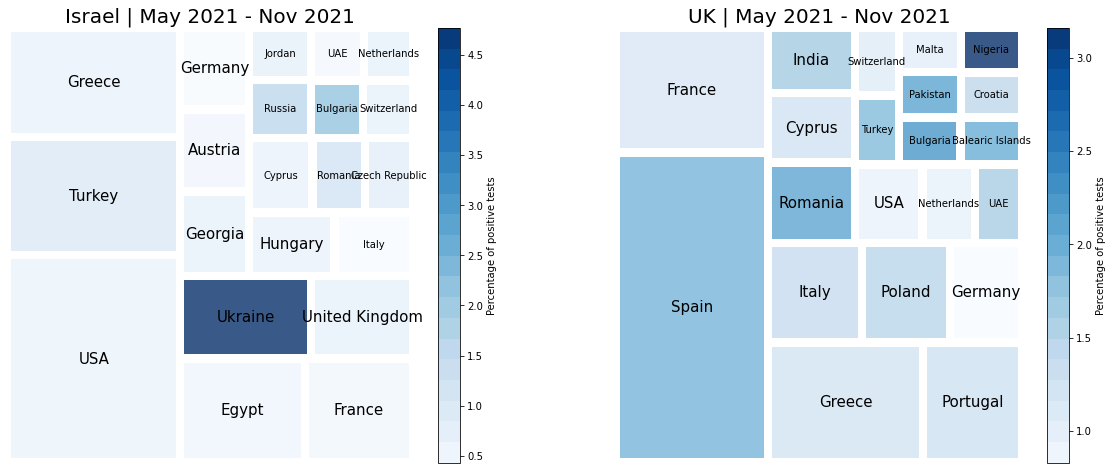

In [27]:
fig, axes = plt.subplots(1,2,figsize=(20,8))

im,sm = preprocessing.Square.squarify_country(df = preprocessing.Square.process_squarify_data(Israel_border_testing,
                                          start_date='2021-05-01',
                                          end_date='2021-11-30',
                                          country_col='Country',
                                          total_col='Total tests',
                                          pos_col='Total positive'),
                                     country_col = 'Country',
                                     total_col='Total tests',
                                     percentage_col = 'positive percentage',
                                     top=20,ax = axes[0])
cbar = fig.colorbar(sm,ax=axes[0])
cbar.set_label('Percentage of positive tests')
# im, sm = preprocessing.Square.squarify_country(df = preprocessing.Square.process_squarify_data(Israel_border_testing,
#                                           start_date='2021-12-01',
#                                           end_date='2022-04-01',
#                                           country_col='Country',
#                                           total_col='Total tests',
#                                           pos_col='Total positive'),
#                                      country_col = 'Country',
#                                      total_col='Total tests',
#                                      percentage_col = 'positive percentage',
#                                      top=20,ax = axes[0,1])
# cbar = fig.colorbar(sm,ax=axes[0,1])
# cbar.set_label('Percentage of positive tests')
im, sm = preprocessing.Square.squarify_country(df = preprocessing.Square.process_squarify_data(UK_border_testing_by_country,
                                          start_date='2021-05-01',
                                          end_date='2021-11-30',
                                          country_col='territory_name',
                                          total_col='total',
                                          pos_col='positive'),
                                     country_col = 'territory_name',
                                     total_col='total',
                                     percentage_col = 'positive percentage',
                                     top=20,ax = axes[1])
cbar = fig.colorbar(sm,ax=axes[1])
cbar.set_label('Percentage of positive tests')
# im, sm = preprocessing.Square.squarify_country(df = preprocessing.Square.process_squarify_data(UK_border_testing_by_country,
#                                           start_date='2021-12-01',
#                                           end_date='2022-04-01',
#                                           country_col='territory_name',
#                                           total_col='total',
#                                           pos_col='positive'),
#                                      country_col = 'territory_name',
#                                      total_col='total',
#                                      percentage_col = 'positive percentage',
#                                      top=20,ax = axes[1,1])
# cbar = fig.colorbar(sm,ax=axes[1,1])
# cbar.set_label('Percentage of positive tests')
axes[0].axis('off')
axes[1].axis('off')
# axes[1,0].axis('off')
# axes[1,1].axis('off')
axes[0].set_title('Israel | May 2021 - Nov 2021',fontsize=20)
axes[1].set_title('UK | May 2021 - Nov 2021',fontsize=20)
# axes[1,0].set_title('UK | May 2021 - Nov 2021',fontsize=20)
# axes[1,1].set_title('UK | Dec 2021 - Mar 2022',fontsize=20)
# axes[0,0].set_yticks([])
# axes[1,0].set_yticks([])
# plt.savefig('countries_of_interest.png',format='png',dpi=300,bbox_inches="tight")